# PANDAS

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


"high-performance module that provides a comprehensive set of structures for working with
data. pandas excels at handling structured data, such as data sets containing many variables, working with
missing values and merging across multiple data sets"

Tabular data ie (spreadsheets), time series data, ...

Key features:
Handling missing data
reshape data
data aligment (sql likes functionality)


Series $\rightarrow$ Numpy Arrays 


DataFrame $\rightarrow$Dictionaries

In [2]:
import pandas as pd
print("Version",pd.__version__)
pd.set_option('max_rows',10)

Version 0.13.1


##  SERIES

One dimensional array of indexed data

In [5]:
#from a list
labels=["a","b","c","d","e"]
ser=pd.Series(rand(len(labels)),index=labels)

ser

a    0.745507
b    0.495196
c    0.151593
d    0.359714
e    0.877656
dtype: float64

In [32]:
print("b" in ser)
print(ser["b"])
print(type(ser.index)) ### index is a pandas core index
print(pd.isnull(pd.Series(ser.to_dict()))) ##series->dictionary->series    


True
0.495195924086
<class 'pandas.core.index.Index'>
a    False
b    False
c    False
d    False
e    False
dtype: bool


In [33]:
s1=pd.Series([1,3,5,np.nan,6,8])
s2=pd.Series(range(1,10))
s3=pd.Series(linspace(1,10,10)) 
#### index get created by passing an array or a list 
print(type(range(1,10)))
print(type(linspace(1,10,10)))

<class 'range'>
<class 'numpy.ndarray'>


In [34]:
s1
s2 ###dtype is int since it was created from a list(int)
s3

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: float64

In [14]:
d1={}#empty dictionary



In [16]:
for i in ser.index:  ###explicit serie to dictionary
    d1[i]=ser[i]
d1

{'a': 0.74550655988358694,
 'b': 0.4951959240864634,
 'c': 0.15159320389135711,
 'd': 0.3597137346671182,
 'e': 0.87765572220903743}

In [29]:
d1["a"] 
print(d1.values())
print(type(d1.keys())) #list
print("-----")

"a" in d1
d1.get("f",3) ## return a default value if not there
print(type(d1.items())) ## a list of ntuples
print("-----")

i=d1.keys()
print("keys",i)
## a dictionary
d1
## a list
l=["a","b","c","d","f"]
#the Series
s=pd.Series(d1,l)

print("-----")

dict_values([0.3597137346671182, 0.74550655988358694, 0.87765572220903743, 0.4951959240864634, 0.15159320389135711])
<class 'dict_keys'>
-----
<class 'dict_items'>
-----
keys dict_keys(['d', 'a', 'e', 'b', 'c'])
-----


In [31]:
s[pd.notnull(s)] ##shows only not null
s[pd.isnull(s)]
s[:3]
s.dropna() 

a    0.745507
b    0.495196
c    0.151593
d    0.359714
dtype: float64

In [85]:
s

a    0.503864
b    0.714617
c    0.514201
d    0.156783
f         NaN
dtype: float64

---

--------------------------------------

In [35]:
##### make a timeseries
dates = pd.date_range("20140101",periods=6)
##  Return a fixed frequency datetime index, with day (calendar) as the default
##  frequency

pd.date_range??

In [36]:
for i in dates:
    print(str(i.year)+'-'+str(i.week)+'-'+str(i.day))


2014-1-1
2014-1-2
2014-1-3
2014-1-4
2014-1-5
2014-2-6


In [123]:
a=rand(6,4)
frame=pd.DataFrame(a,index=dates,columns=["a","b","c","d"])
## index 6 x 4 colums

##frame=pd.DataFrame(a,columns=["a","b","c","d"]) auto number of row indexs

In [132]:
frame['a']
frame.loc[:,['a']]
###frame.loc??
(frame.c)[3:] ### return a Series which with indexing selection

2014-01-04    0.790501
2014-01-05    0.224707
2014-01-06    0.596989
Freq: D, Name: c, dtype: float64

----------------------------

In [5]:
import pandas as pd
ser=pd.Series()
for i in range (1,10):
    ser["Col %s"%i]=randn(100)
##hist(x,10)
ser.shape


(9,)

In [6]:
ser.values
ser.index

Index([u'Col 1', u'Col 2', u'Col 3', u'Col 4', u'Col 5', u'Col 6', u'Col 7', u'Col 8', u'Col 9'], dtype='object')

In [7]:
dic={}
for i in ser.index:
    dic[i]=ser[i]

In [8]:
##ser[ser['Col 1']>1] ## not working for a serier but does for a df

In [9]:
df=pd.DataFrame(dic)

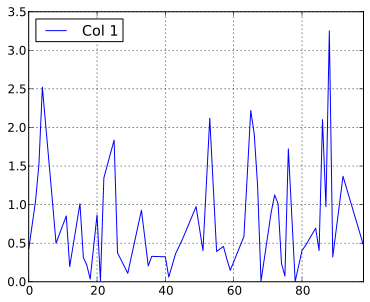

In [10]:
##print(((df[df["Col 3"]>0]).loc[:,["Col 1"]]).mean)
line=((df[df["Col 1"]>0]).loc[:,["Col 1"]]).plot()
line
##plot col 1 of the df where only values of col 1 > 0

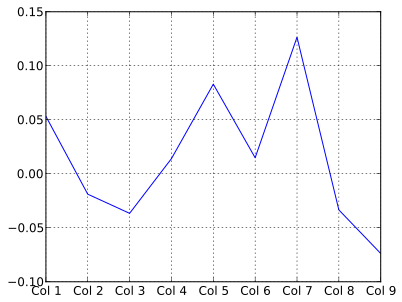

In [11]:
df.mean(0).plot() ## col wise
##df.mean(1).hist() ## row wise

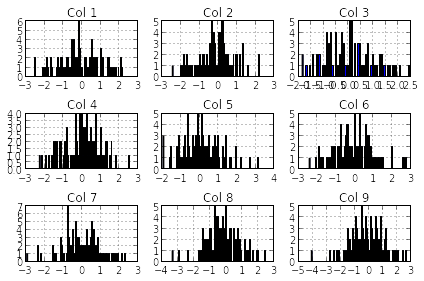

In [154]:
df.hist(bins=100)
tight_layout()

In [57]:
df.to_csv("./nrand.csv")

In [35]:
dc=pd.read_csv("./nrand.csv")

dc[dc["Col 1"]>1]
dc1=dc.drop(0) #### drop working row wise
dc1.columns  ###

Index([u'Unnamed: 0', u'Col 1', u'Col 2', u'Col 3', u'Col 4', u'Col 5', u'Col 6', u'Col 7', u'Col 8', u'Col 9'], dtype='object')

In [53]:
a=arange(12)
v=a.reshape(4,3)
index=[["a","b","c","d"],[1,2,1,2]]
columns=[["vi","vi","tv"],["green","red","red"]]

In [54]:
frame=pd.DataFrame(v,index=index,columns=columns)

In [55]:
frame.head ##double index in either axies

<bound method DataFrame.head of        vi      tv
    green red red
a 1     0   1   2
b 2     3   4   5
c 1     6   7   8
d 2     9  10  11>

In [59]:
frame.index.names=['key1','key2']
frame.columns.names=["prov","color"]
frame

prov         vi      tv
color     green red red
key1 key2              
a    1        0   1   2
b    2        3   4   5
c    1        6   7   8
d    2        9  10  11

In [67]:
frame.ix[1]["vi"]

color
green    3
red      4
Name: (b, 2), dtype: int32

## DATAFRAMES


Multidimensional arrays with atttached row and column labels

In [110]:
df=pd.DataFrame({"Col 1":rand(6),"Col 2":["foo","bar"]*3,"Col 3":rand(6)})
print(df.index)
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
Index([u'Col 1', u'Col 2', u'Col 3'], dtype='object')


In [114]:
df["Col 4"]=randn(6)
df ###add a col


,Col 1,Col 2,Col 3,Col 4
0,0.572267,foo,0.409871,-0.630488
1,0.391123,bar,0.511385,1.306894
2,0.002737,foo,0.183711,-2.676117
3,0.724602,bar,0.158286,0.699241
4,0.497928,foo,0.684499,2.298566
5,0.620456,bar,0.097152,0.300550


In [122]:
%%timeit
df.ix[2,"Col 1"] ## a sub dataframe

100000 loops, best of 3: 7.12 µs per loop


In [126]:
df.ix[2:5,1:2]

,Col 2
2,foo
3,bar
4,foo
5,bar


In [123]:
%%timeit
df.get_value(2,"Col 1") ### faster but retrun a single value 

100000 loops, best of 3: 4.72 µs per loop


In [1]:
import pandas
a = pandas.DataFrame(random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values
m=random.rand(4,5),
m


(array([[ 0.81111045,  0.86659234,  0.11116695,  0.23766356,  0.78341635],
        [ 0.16814254,  0.02959095,  0.68990572,  0.08648915,  0.52314259],
        [ 0.22344716,  0.15507216,  0.37007156,  0.39874655,  0.73029819],
        [ 0.2892835 ,  0.77817974,  0.96431184,  0.63002874,  0.99369266]]),)

In [2]:
b = matrix([[1,2],[3,4]])
b_asarray = asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

------------------------

In [186]:
%run ../Eq/NBCONFIG.ipynb

In [187]:
%sql select * from ELEMENTS


113 rows affected.


Z,SYMBOL,NAME,Z1,A,PA
0,VACUUM,VACUUM,0,0,0.0
1,H,HYDROGEN,1,1,1.00794
2,HE,HELIUM,2,4,4.0026
3,LI,LITHIUM,3,7,6.941
4,BE,BERYLLIUM,4,9,9.01218
5,B,BORON,5,11,10.811
6,C,CARBON,6,12,12.0107
7,N,NITROGEN,7,14,14.0067
8,O,OXYGEN,8,16,15.9994
9,F,FLUORINE,9,19,18.9984


In [188]:
eleme=_

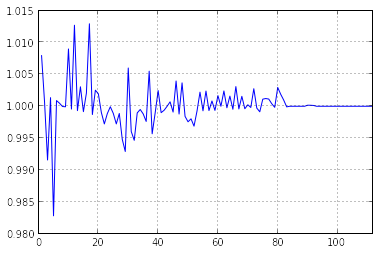

In [191]:

(ef['PA']/ef['A']).plot(kind='line')


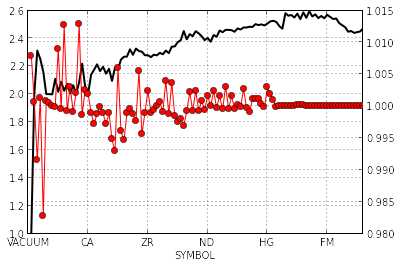

In [272]:
df=eleme.DataFrame()
index=df['SYMBOL']
data=df.loc[:,['Z','A','PA']]
columns=['Z','A','PA']
df1=pd.DataFrame(data.values,index=index,columns=columns)
(df1['PA']/df1['Z']).plot(color='black',linewidth=2)
fig=gcf()
ax=gca()
axr=ax.twinx()
(df1['PA']/df1['A']).plot(marker='o',color='red') ##left side

In [78]:
from datetime import datetime

In [80]:
datetime.now()


datetime.datetime(2014, 12, 19, 18, 36, 8, 825562)

-------------

In [244]:
ts =pd.Series(randn(100), index=pd.date_range('20140101', periods=100))

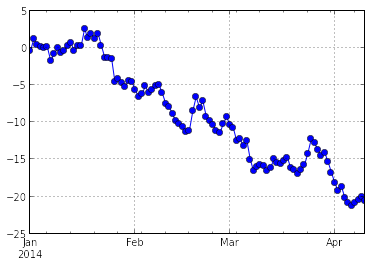

In [257]:
ax=(ts.cumsum()).plot(marker='o')

In [1]:
%%javascript
$.getScript( "http://tessarinseve.pythonanywhere.com/JupyterNotebooks/sectionnumbering.js", function( data, textStatus, jqxhr ) {
  console.log( data ); // Data returned
  console.log( textStatus ); // Success
  console.log( jqxhr.status ); // 200
});

<IPython.core.display.Javascript object>